In [1]:
import geometry
import numpy as np
import numba as nb
import ezdxf
import matplotlib.pyplot as plt
import pyperclip

In [2]:
def format_fp(d, N=5):
    """Format a floating point number to N decimal places."""
    return f"{d:.{N}f}"

def path_to_cpp(path: geometry.Path):
    """Convert a Path object to a compact array format for C++."""
    points = path.to_compact_array()

    s = "path *p = path::from_compact_array({\n"
    for point in points:
        s += f"\tcompact_point({format_fp(point[0])}, {format_fp(point[1])}, {format_fp(point[2])}),\n"

    s += "});\n"
    return s



In [3]:
import matplotlib.pyplot as plt

def draw_line(ax, line: geometry.LineSegment):
    plt.plot([line.start.x, line.end.x], [line.start.y, line.end.y], 'k-')

def draw_arc(ax, arc: geometry.ArcSegment):
    # print(f"Start angle: {arc.start_angle}, End angle: {arc.end_angle}, Center: {arc.center}")
    angle = np.linspace(arc.start_angle, arc.end_angle, 25)
    x = arc.center.x + arc.radius * np.cos(angle)
    y = arc.center.y + arc.radius * np.sin(angle)
    ax.plot(x, y, 'k-')

def draw_segment(ax, segment: geometry.Segment):
    if isinstance(segment, geometry.LineSegment):
        draw_line(ax, segment)
    elif isinstance(segment, geometry.ArcSegment):
        draw_arc(ax, segment)

def draw_path(ax, path: geometry.Path):
    for segment in path.segments():
        draw_segment(ax, segment)

(np.float64(1.15), np.float64(8.85), np.float64(0.25), np.float64(27.75))

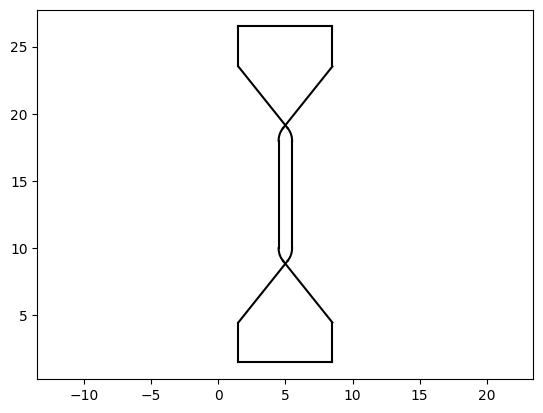

In [4]:
# load_dxf
# filename = "dogbone_test.dxf"

def load_dxf(filename) -> geometry.Path:
    """Load a DXF file and extract paths from LWPOLYLINE entities."""
    doc = ezdxf.readfile(filename)
    msp = doc.modelspace()

    paths = []
    polylines = msp.query("LWPOLYLINE")
    for path in polylines:
        points = np.array(path.get_points())
        points = points[:, [0, 1, 4]].astype(np.float32)  # x, y, bulge
        paths.append(geometry.Path.from_compact_array(points))

    if len(paths) == 0:
        return None
    elif len(paths) > 1:
        return paths
    else:
        return paths[0]

path = load_dxf("dogbone_test.dxf")
draw_path(plt.gca(), path.offset(-1.5))
plt.axis('equal')

In [5]:
# Load geometry
doc = ezdxf.readfile("oblong_rectangle.dxf")
msp = doc.modelspace()

In [6]:
# Get all polylines
polylines = msp.query("LWPOLYLINE")
paths = [np.array(x.get_points())[:, [0, 1, 4]] for x in polylines]
paths[0]

array([[1.70000000e+01, 0.00000000e+00, 4.14213562e-01],
       [2.00000000e+01, 3.00000000e+00, 0.00000000e+00],
       [2.00000000e+01, 7.00000000e+00, 4.14213562e-01],
       [1.70000000e+01, 1.00000000e+01, 0.00000000e+00],
       [3.00000000e+00, 1.00000000e+01, 4.14213562e-01],
       [0.00000000e+00, 7.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.00000000e+00, 4.14213562e-01],
       [3.00000000e+00, 4.00000000e-16, 0.00000000e+00]])

In [7]:
path = load_dxf("oblong_rectangle.dxf")

In [8]:
path2 = path.offset(1)
path2.is_null()

False

In [9]:
path2.segments()

In [10]:
segs = path.segments()
segs[0].end_angle

-0.3997265696525574

In [11]:
np.atan(.4142)

np.float64(0.3926875054336765)

In [12]:
np.atan(.4142)/np.pi*180*4

np.float64(89.99734691548097)

In [13]:
path.to_compact_array()

array([[1.7000000e+01, 0.0000000e+00, 1.9526216e-01],
       [2.0000000e+01, 3.0000000e+00, 0.0000000e+00],
       [2.0000000e+01, 7.0000000e+00, 1.9526218e-01],
       [1.7000000e+01, 1.0000000e+01, 0.0000000e+00],
       [3.0000000e+00, 1.0000000e+01, 1.9526218e-01],
       [0.0000000e+00, 7.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 3.0000000e+00, 1.9526215e-01],
       [3.0000000e+00, 4.0000001e-16, 0.0000000e+00]], dtype=float32)

In [14]:
points = np.vstack([np.array([np.cos(theta), np.sin(theta), 0]) for theta in np.linspace(0, np.pi*2, 6)])

path = geometry.Path.from_compact_array(points.astype(np.float32))
path = path.offset(1)

(np.float64(-1.9994677901268005),
 np.float64(2.1904508471488953),
 np.float64(-2.1461621910333624),
 np.float64(2.1461621314287154))

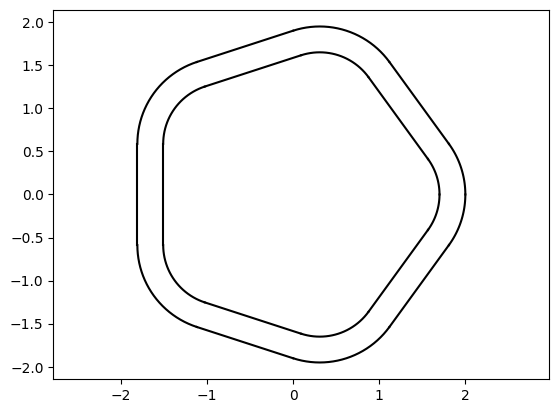

In [15]:


ax = plt.gca()
draw_path(ax, path)
temp = path.offset(-0.3)
draw_path(ax, temp)
plt.axis('equal')
# draw_path(ax, path.offset(-1))@

In [16]:
def format_data(d, N=2):
    if isinstance(d, dict):
        return {k: format_data(v, N) for k, v in d.items()}
    elif hasattr(d, '__iter__'):
        return tuple([format_data(x) for x in d])
    else:
        return round(d, N)

for segment in temp.segments():
    print(format_data(segment.to_dict()))

{'center': (1.0, 0.0), 'start': (1.7, 0.0), 'end': (1.57, 0.41), 'radius': 0.7, 'start_angle': -0.0, 'end_angle': 0.63, 'nhat_start': (1.0, 0.0), 'nhat_end': (0.81, 0.59), 'is_clockwise': 0}
{'start': (1.57, 0.41), 'end': (0.88, 1.36), 'nhat': (0.81, 0.59), 'vhat': (-0.59, 0.81)}
{'center': (0.31, 0.95), 'start': (0.88, 1.36), 'end': (0.09, 1.62), 'radius': 0.7, 'start_angle': 0.63, 'end_angle': 1.88, 'nhat_start': (0.81, 0.59), 'nhat_end': (-0.31, 0.95), 'is_clockwise': 0}
{'start': (0.09, 1.62), 'end': (-1.03, 1.25), 'nhat': (-0.31, 0.95), 'vhat': (-0.95, -0.31)}
{'center': (-0.81, 0.59), 'start': (-1.03, 1.25), 'end': (-1.51, 0.59), 'radius': 0.7, 'start_angle': 1.88, 'end_angle': 3.14, 'nhat_start': (-0.31, 0.95), 'nhat_end': (-1.0, 0.0), 'is_clockwise': 0}
{'start': (-1.51, 0.59), 'end': (-1.51, -0.59), 'nhat': (-1.0, -0.0), 'vhat': (0.0, -1.0)}
{'center': (-0.81, -0.59), 'start': (-1.51, -0.59), 'end': (-1.03, -1.25), 'radius': 0.7, 'start_angle': -3.14, 'end_angle': -1.88, 'nhat

In [17]:


def print_segment_info(seg):
    d = seg.to_dict()
    d2 = dict()
    for k, v in d.items():
        if "nhat" in k:
            d2[k] = format_data(v, 2)
    print(d2)

print_segment_info(path2.segments()[0])

# for seg in path2.segments():
#     print_segment_info(seg)

# from geometry import Vec2D
# test = geometry.ArcSegment.arc1(Vec2D(0, 0), Vec2D(1, 0), np.pi/8)
# print_segment_info(test)

{'nhat_start': (0.0, -1.0), 'nhat_end': (0.39, -0.92)}


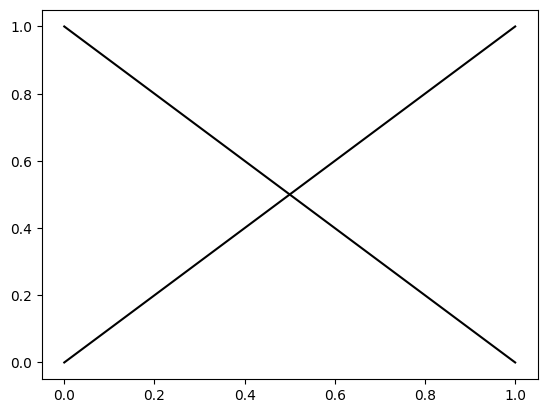

In [18]:
from geometry import intersections, Path, LineSegment, Vec2D

path1 = Path.from_compact_array(
    np.array([[0, 0, 0], [1, 1, 0]]).astype(np.float32),
    False
)
path2 = Path.from_compact_array(
    np.array([[1, 0, 0], [0, 1, 0]]).astype(np.float32),
    False
)

ax = plt.gca()
draw_path(ax, path1)
draw_path(ax, path2)

test = intersections([path1, path2])

Vec2D(5.0, 8.848828315734863)
Vec2D(5.000000953674316, 19.15117073059082)


2

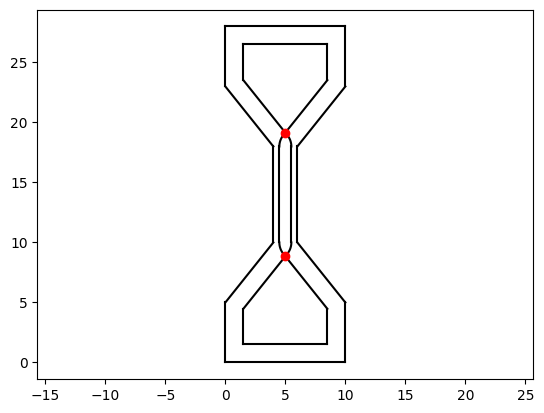

In [19]:
from geometry import intersections, Path, LineSegment, Vec2D

ax = plt.gca()
path = load_dxf("dogbone_test.dxf")
draw_path(ax, path)
path = path.offset(-1.5)


draw_path(ax, path)

test = intersections([path])

for i in test:
    p = i['point']
    print(p)
    plt.plot(p.x, p.y, 'ro')

plt.axis('equal')
len(test)

path *p = path::from_compact_array({
	compact_point(8.50000, 4.47383, 0.00000),
	compact_point(4.82870, 9.06296, -0.17030),
	compact_point(4.50000, 10.00000, 0.00000),
	compact_point(4.50000, 18.00000, -0.17030),
	compact_point(4.82870, 18.93704, 0.00000),
	compact_point(8.50000, 23.52617, 0.00000),
	compact_point(8.50000, 26.50000, 0.00000),
	compact_point(1.50000, 26.50000, 0.00000),
	compact_point(1.50000, 23.52617, 0.00000),
	compact_point(5.17130, 18.93704, -0.17030),
	compact_point(5.50000, 18.00000, 0.00000),
	compact_point(5.50000, 10.00000, -0.17030),
	compact_point(5.17130, 9.06296, 0.00000),
	compact_point(1.50000, 4.47383, 0.00000),
	compact_point(1.50000, 1.50000, 0.00000),
	compact_point(8.50000, 1.50000, 0.00000),
});



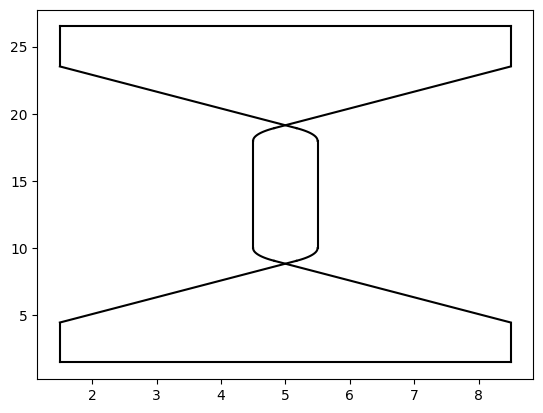

In [20]:
ax = plt.gca()
draw_path(ax, path)

loops = path.get_closed_loops()

s = path_to_cpp(path)
pyperclip.copy(path_to_cpp(path))
print(s)

In [21]:
def approx_arc_area(arc: geometry.ArcSegment, num_points=100):
    """Approximate the area of an arc segment using numerical integration."""
    if arc.radius == 0:
        return 0.0

    # Generate points along the arc
    angles = np.linspace(arc.start_angle, arc.end_angle, num_points)
    x = arc.center.x + arc.radius * np.cos(angles)
    y = arc.center.y + arc.radius * np.sin(angles)

    # Calculate the area using the trapezoidal rule
    area = 0.0
    for i in range(num_points - 1):
        # Area of trapezoid between two points
        h = (x[i+1] - x[i])  # Width of trapezoid
        avg_height = (y[i] + y[i+1]) / 2.0  # Average height
        area += h * avg_height

    return area

def line_area(line: geometry.LineSegment):
    return 0.5 * (line.end.x - line.start.x) * (line.start.y + line.end.y)

In [22]:
path.segments()[4].to_dict()

{'start': (4.8286967277526855, 18.937042236328125),
 'end': (8.5, 23.526168823242188),
 'nhat': (0.780868649482727, -0.6246952414512634),
 'vhat': (0.6246952414512634, 0.780868649482727)}

Signed area before offset: -176.0
Signed area after offset: -176.0
path *p = path::from_compact_array({
	compact_point(10.00000, 5.00000, 0.00000),
	compact_point(6.00000, 10.00000, 0.00000),
	compact_point(6.00000, 18.00000, 0.00000),
	compact_point(10.00000, 23.00000, 0.00000),
	compact_point(10.00000, 28.00000, 0.00000),
	compact_point(-0.00000, 28.00000, 0.00000),
	compact_point(-0.00000, 23.00000, 0.00000),
	compact_point(4.00000, 18.00000, 0.00000),
	compact_point(4.00000, 10.00000, 0.00000),
	compact_point(0.00000, 5.00000, 0.00000),
	compact_point(0.00000, 0.00000, 0.00000),
	compact_point(10.00000, 0.00000, 0.00000),
});



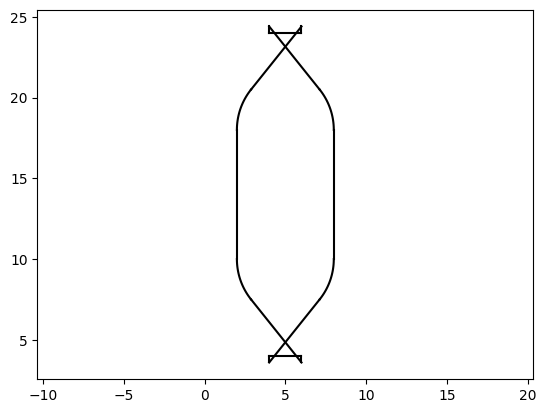

In [23]:
path = load_dxf("dogbone_test.dxf")
print(f"Signed area before offset: {path.signed_area()}")
# path = path.offset(-3)
# draw_path(plt.gca(), path.offset(-4))
path2 = path.offset(-4)
draw_path(plt.gca(), path2)
plt.axis('equal')
print(f"Signed area after offset: {path.signed_area()}")



s = path_to_cpp(path)
pyperclip.copy(path_to_cpp(path))
print(s)

-94.77604675292969
-94.77605438232422
-94.77603149414062
-94.77603912353516


[{'path1': <geometry.Path at 0x7cdf526165f0>,
  'index1': 9,
  'path2': <geometry.Path at 0x7cdf526165f0>,
  'index2': 3,
  'point': Vec2D(5.5, 18.32015609741211)},
 {'path1': <geometry.Path at 0x7cdf526165f0>,
  'index1': 11,
  'path2': <geometry.Path at 0x7cdf526165f0>,
  'index2': 1,
  'point': Vec2D(5.5, 9.67984390258789)},
 {'path1': <geometry.Path at 0x7cdf526165f0>,
  'index1': 9,
  'path2': <geometry.Path at 0x7cdf526165f0>,
  'index2': 3,
  'point': Vec2D(5.5, 18.32015609741211)},
 {'path1': <geometry.Path at 0x7cdf526165f0>,
  'index1': 11,
  'path2': <geometry.Path at 0x7cdf526165f0>,
  'index2': 1,
  'point': Vec2D(5.5, 9.67984390258789)}]

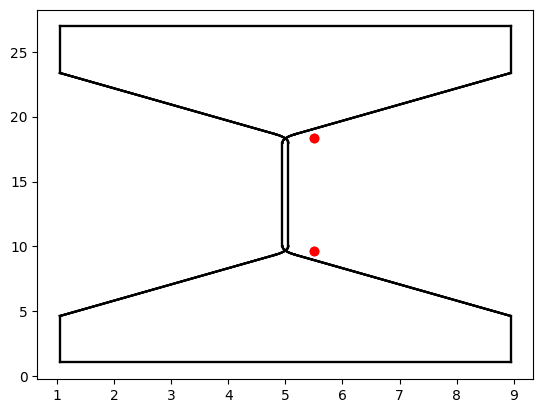

In [37]:
path2 = path.offset(-1.05)
loops = path2.get_closed_loops()
inter = intersections([path2])

ax = plt.gca()
for loop in loops:
    if not loop.clockwise_winding():
        print(loop.signed_area())
        draw_path(ax, loop)

for i in inter:
    plt.plot(i['point'].x, i['point'].y, 'ro')

inter

In [25]:
path2.segments()